In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2024-06-18 19:10:03.133159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 19:10:03.485839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 19:10:03.493660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 19:10:08.017204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Tensors

Tensors are the building Blocks. They represent a fundamental Data Structure in TensorFlow. They are n-dimensional arrays that holds our data. 

They have two important properties:

- Shape:Defines the dimension 
- Data Type : All elements in the tensor have same data type

In [3]:
x = tf.constant([[1.,2.,3.],
                 [4.,5.,6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


2024-06-18 19:10:15.221013: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (100)


### Operations on Tensor

In [4]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [5]:
10 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[10., 20., 30.],
       [40., 50., 60.]], dtype=float32)>

In [6]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [7]:
tf.concat([x,x,x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [8]:
print(tf.reduce_sum(x))

tf.Tensor(21.0, shape=(), dtype=float32)


In [9]:
my_tensor = tf.constant([1, 2, 3, 4])
my_tensor.dtype

tf.int32

## Variables

Normal tf.Tensor objects are immutable.

Which is why, to store mutable objects, mostly model parameters are stored as tf.Variable

In [10]:
var = tf.Variable([0.0,0.0,0.0])
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [11]:
var.assign([1,2,3])
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [12]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

### derivative of a function

In [13]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x*x*x - 5
  return y

In [14]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [15]:
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y,x)
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

## Graphs and tf.function

to speed up performance and inference<br>
can use tf.function to separate pure-TensorFlow code from Python

In [16]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_prod(x)

Initially, captures a complete graph representing the TensorFow Computations done within the function

In [17]:
x = tf.constant([1,2,3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

Only executes optimzed graph, skipping any non TensorFlow steps. 

The below function doesn't print 'Tracing.' as it is a python function and not a tensorflow function

In [18]:
x = tf.constant([1,2,3])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

Change in shape or dtype will create a new graph

In [19]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)


Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=746.2>

## Modules, Layers and Models

In [20]:
class Module(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)

    @tf.function
    def multiply(self, x):
        return x * self.weight
    

In [21]:
mod = Module(3)
print(mod.multiply(tf.constant([1,2,3])))

tf.Tensor([3 6 9], shape=(3,), dtype=int32)


In [22]:
save_path = './saved'

tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


In [23]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1,2,3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

## Activation Functions

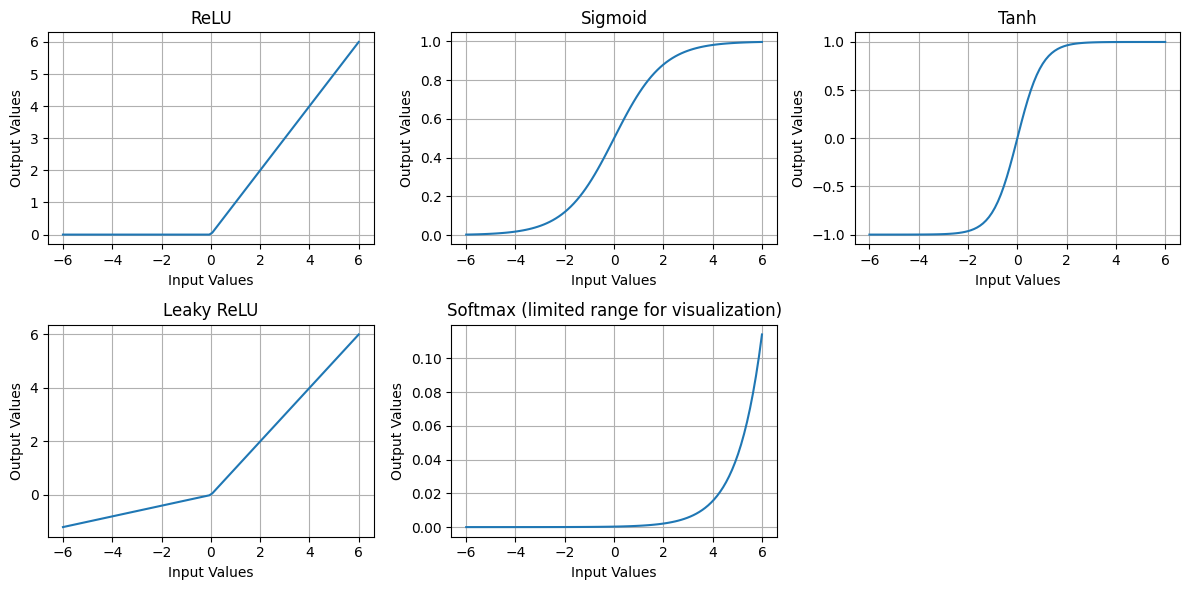

In [24]:
def plot_activation_functions(x_values, rows, cols):
  """
  Plots various activation functions using TensorFlow and matplotlib in subplots.

  Args:
      x_values: A NumPy array of input values for the activation functions.
      rows: Number of rows for the subplot grid.
      cols: Number of columns for the subplot grid.
  """

  activation_functions = [
      (tf.nn.relu, "ReLU"),
      (tf.nn.sigmoid, "Sigmoid"),
      (tf.nn.tanh, "Tanh"),
      (tf.nn.leaky_relu, "Leaky ReLU"),
      (tf.nn.softmax, "Softmax (limited range for visualization)"),
  ]

  plt.figure(figsize=(12, 6))  

  for i, (activation_func, label) in enumerate(activation_functions):
    plt.subplot(rows, cols, i + 1)  
    y_values = activation_func(x_values)
    plt.plot(x_values, y_values)
    plt.xlabel("Input Values")
    plt.ylabel("Output Values")
    plt.title(label)
    plt.grid(True)
  plt.tight_layout()  
  plt.show()

x_values = np.linspace(start=-6, stop=6, num=100)

rows = 2
cols = 3

plot_activation_functions(x_values, rows, cols)


## Cost Functions

4/4 [==============================] - 0s 6ms/step


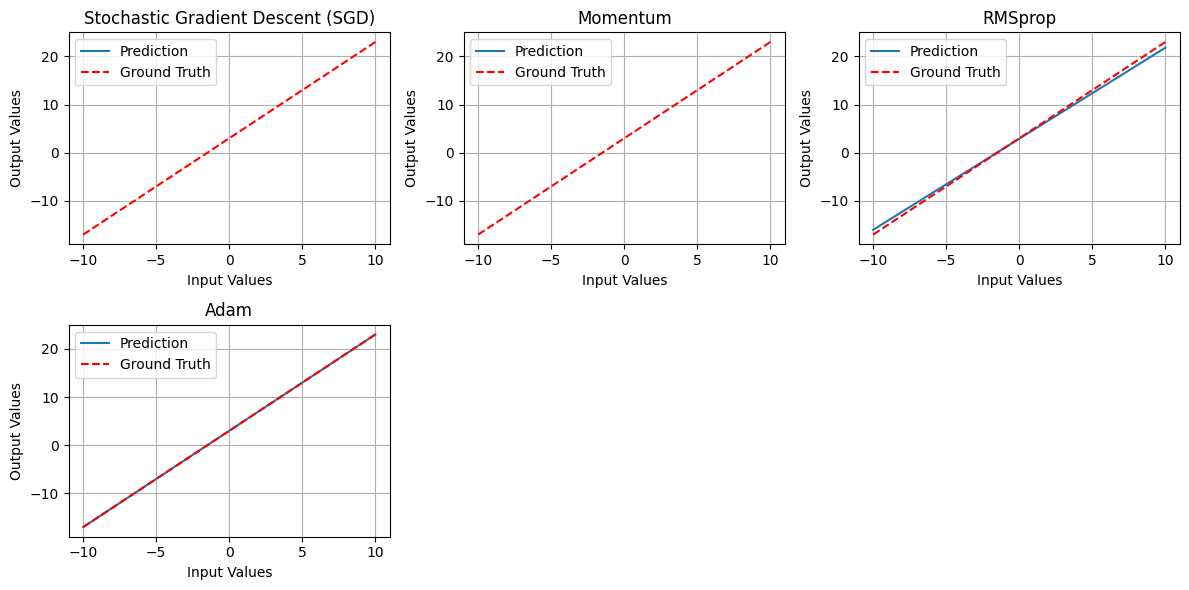

In [25]:
def plot_optimizers(x_values, y_values, rows, cols, learning_rate=0.1, num_steps=100):
    """
    Plots the behavior of various optimization algorithms using TensorFlow and matplotlib in subplots.

    Args:
        x_values: A NumPy array of input values.
        y_values: A NumPy array of target values.
        rows: Number of rows for the subplot grid.
        cols: Number of columns for the subplot grid.
        learning_rate: The learning rate for the optimization algorithms.
        num_steps: The number of steps to run the optimization.
    """

    optimizers = [
        (tf.keras.optimizers.SGD(learning_rate), "Stochastic Gradient Descent (SGD)"),
        (tf.keras.optimizers.SGD(learning_rate, momentum=0.9), "Momentum"),
        (tf.keras.optimizers.RMSprop(learning_rate), "RMSprop"),
        (tf.keras.optimizers.Adam(learning_rate), "Adam"),
    ]

    plt.figure(figsize=(12, 6))

    for i, (optimizer, label) in enumerate(optimizers):
        plt.subplot(rows, cols, i + 1)

        model = tf.keras.Sequential([
            tf.keras.layers.Dense(1, input_shape=(1,))
        ])
        model.compile(optimizer=optimizer, loss='mean_squared_error')

        model.fit(x_values, y_values, epochs=num_steps, verbose=0)
        y_pred = model.predict(x_values)
        plt.plot(x_values, y_pred, label='Prediction')
        plt.plot(x_values, y_values, 'r--', label='Ground Truth')
        plt.xlabel("Input Values")
        plt.ylabel("Output Values")
        plt.title(label)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

x_values = np.linspace(-10, 10, 100)
y_values = 2 * x_values + 3

rows = 2
cols = 3

plot_optimizers(x_values, y_values, rows, cols)